# Pyfilaments exploratory data analysis notebook

In [37]:
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import interpolate

import os
import pyfilaments.analysisutils as analysis
import imp
imp.reload(analysis)
%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm
from tqdm import tqdm

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 12})

In [38]:
# Load data

root_folder = '/media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/BendingStiffnessSweeps/b0_4_activity_time_2000'
# bond length = 2.1
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_3.75_k_15_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_5.0_k_20_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_6.25_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_7.5_k_30_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_12.5_k_50_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_01.hdf5'


# bond length = 4
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_5.0_k_20_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_02.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_7.5_k_30_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_10.0_k_40_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_12.5_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_15.0_k_60_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_20.0_k_80_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-06/SimResults_Np_32_Shape_line_kappa_hat_25.0_k_100_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'

# k = 65
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-09/SimResults_Np_32_Shape_line_kappa_hat_16.25_k_65_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# k = 75
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-09/SimResults_Np_32_Shape_line_kappa_hat_18.75_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'

# Irrational number for spring constant:
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-12/SimResults_Np_32_Shape_line_kappa_hat_17_k_69_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-12/SimResults_Np_32_Shape_line_kappa_hat_18_k_72_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_02.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-12/SimResults_Np_32_Shape_line_kappa_hat_19_k_75_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_02.hdf5'

# file = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/2021-02-04/SimResults_Np_32_Shape_line_kappa_hat_6.25_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_01.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_6.25_k_25_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-07/SimResults_Np_32_Shape_line_kappa_hat_5.0_k_20_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point/SimResults_00.hdf5'


# Long dataset (750 cycles)
# file = '/home/deepak/LacryModelling_Local/SimulationData/2021-02-11/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'

file = 'SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_00.hdf5'
# file = 'SimResults_Np_32_Shape_line_kappa_hat_12.5_k_50_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point/SimResults_01.hdf5'
folder, *rest = os.path.split(os.path.join(root_folder, file))

print(folder)

filament = analysis.analysisTools(file = os.path.join(root_folder, file))

file_path = filament.analysis_folder




/media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/BendingStiffnessSweeps/b0_4_activity_time_2000/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
3
Loading Simulation data from disk ...
Loading hdf5 file
Time step: 9.99990000099999
No:of particles : 32
No:of time points : 100001
Root path:  /media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/BendingStiffnessSweeps/b0_4_activity_time_2000/SimResults_Np_32_Shape_line_kappa_hat_17.5_k_70_b0_4_F_0_S_0_D_1.5_activityTime_2000_simType_point
Data file SimResults_00.hdf5


In [4]:
# Calculate the filament length vs time

filament.compute_arc_length()

<IPython.core.display.Javascript object>


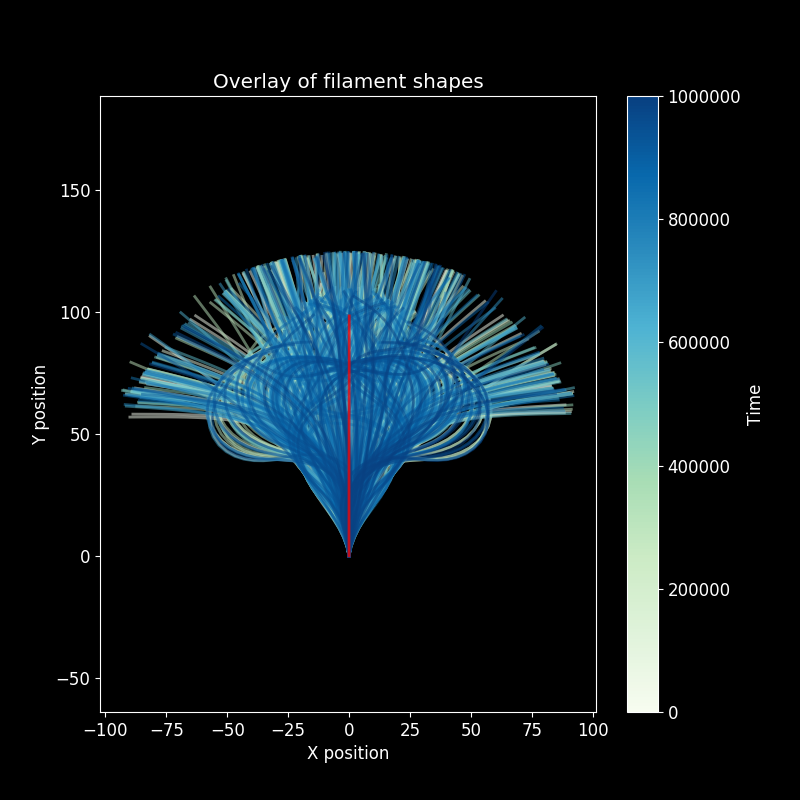

In [39]:
# Overlay of filament shapes
plt.style.use('dark_background')
filament.plot_filament_centerlines(stride = 100, save = False, color_by = 'Time')

# Tip search-coverage and unique locations sampled


Total unique positions sampled by tip: 390.0
Total hits : 37501


<IPython.core.display.Javascript object>


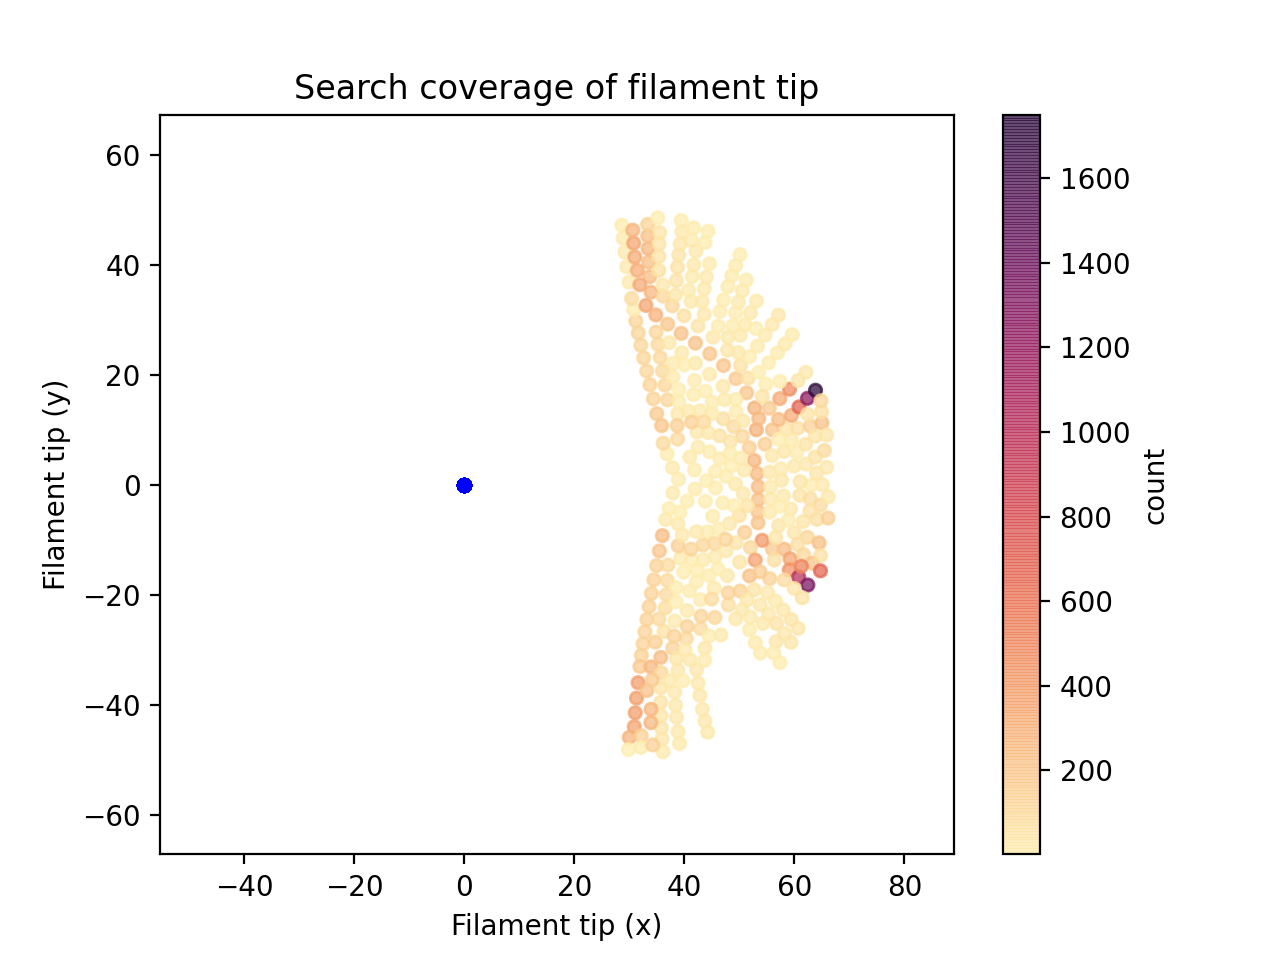

1


<IPython.core.display.Javascript object>


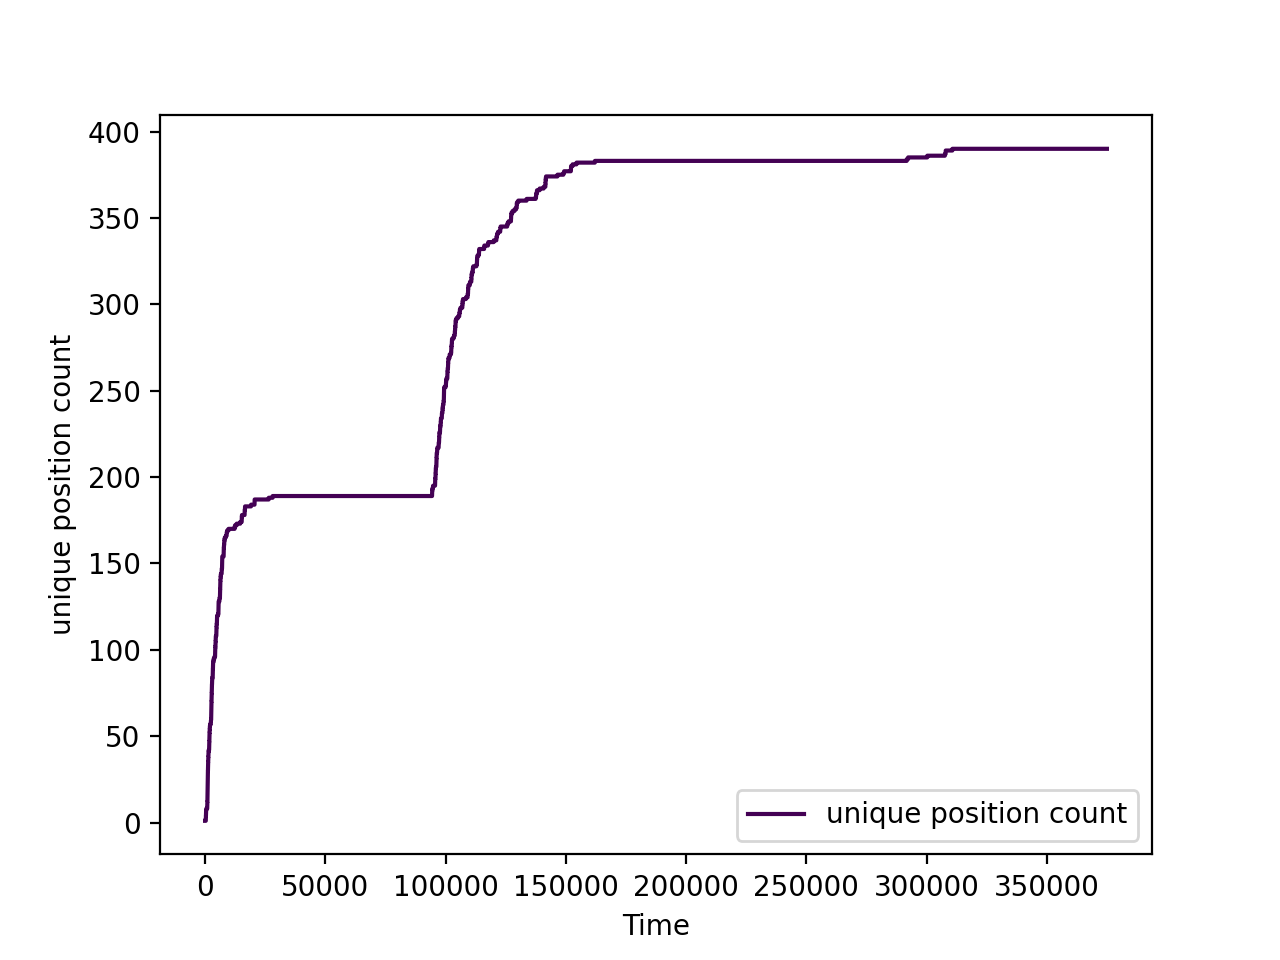

In [300]:
filament.filament_tip_coverage(save = True)
plt.style.use('default')
filament.plot_unique_tip_locations(save = True)
filament.plot_timeseries(var = ['unique position count'], save = True)

## Alternate plotting method for search clouds

<IPython.core.display.Javascript object>


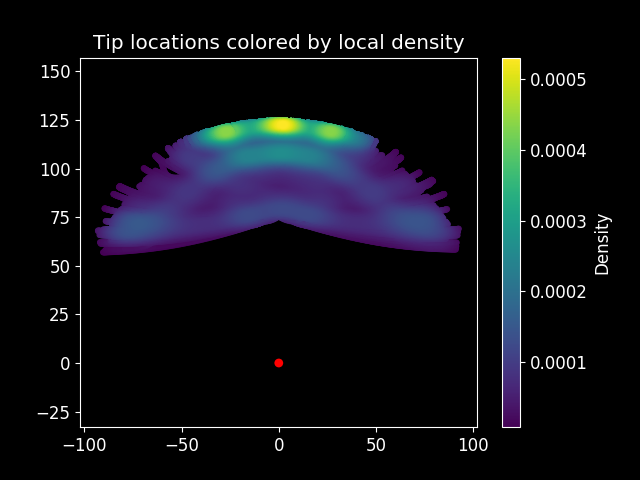

In [41]:
filament.plot_tip_scatter_density(save = True)

# Unique positions sampled (prelim results)

- k = 30, Total unique positions sampled by tip: 257.0
- k = 40, Total unique positions sampled by tip: 211.0
- k = 50, Total unique positions sampled by tip: 436.0
- k = 70, Total unique positions sampled by tip: 1423.0
- k = 100, Total unique positions sampled by tip: 460.0

# Tangent angle representation
We compute the coordinate-free tangent angle representation of the filament shape.

<IPython.core.display.Javascript object>


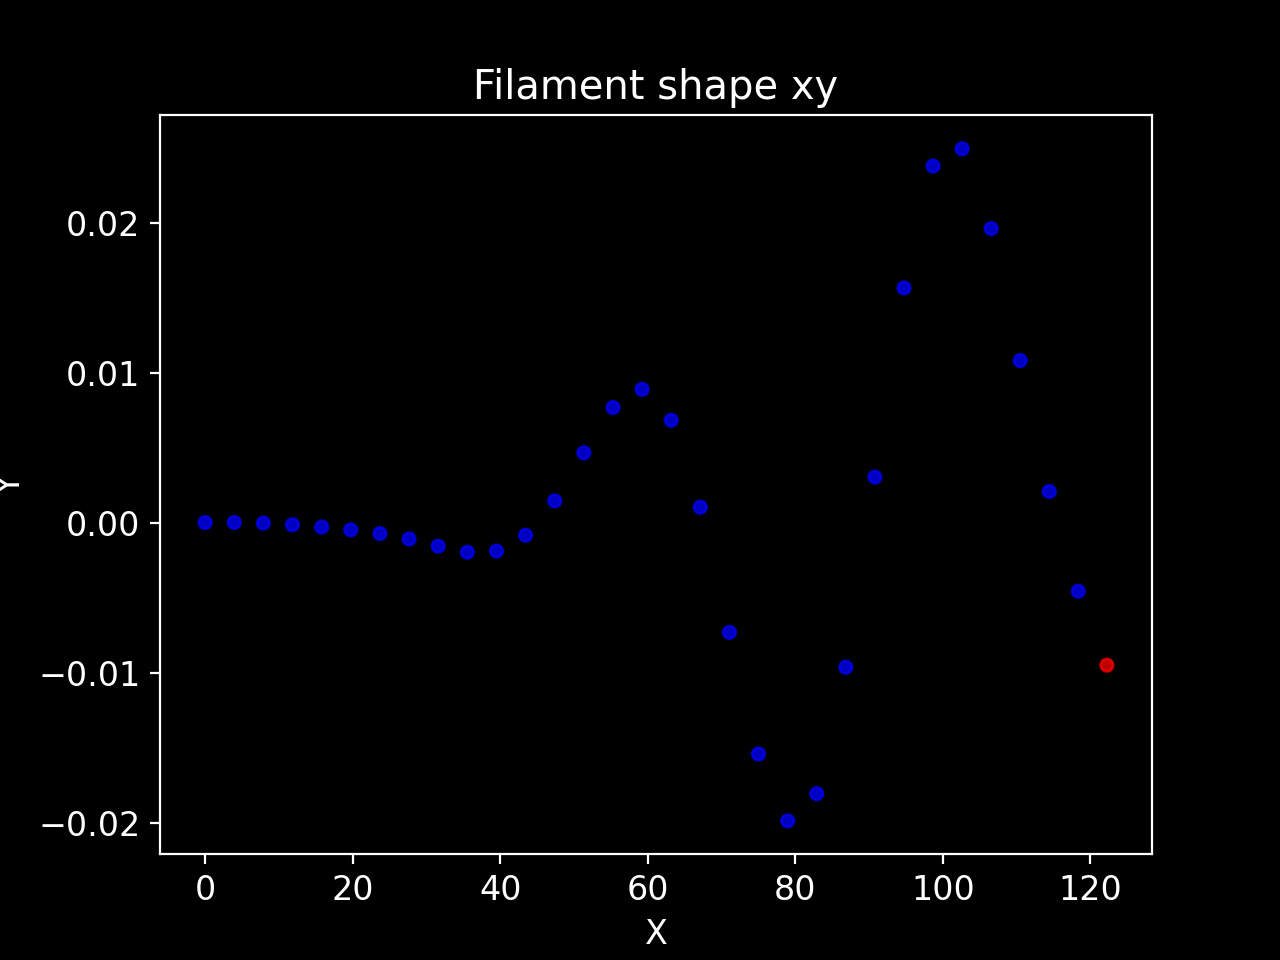

<IPython.core.display.Javascript object>


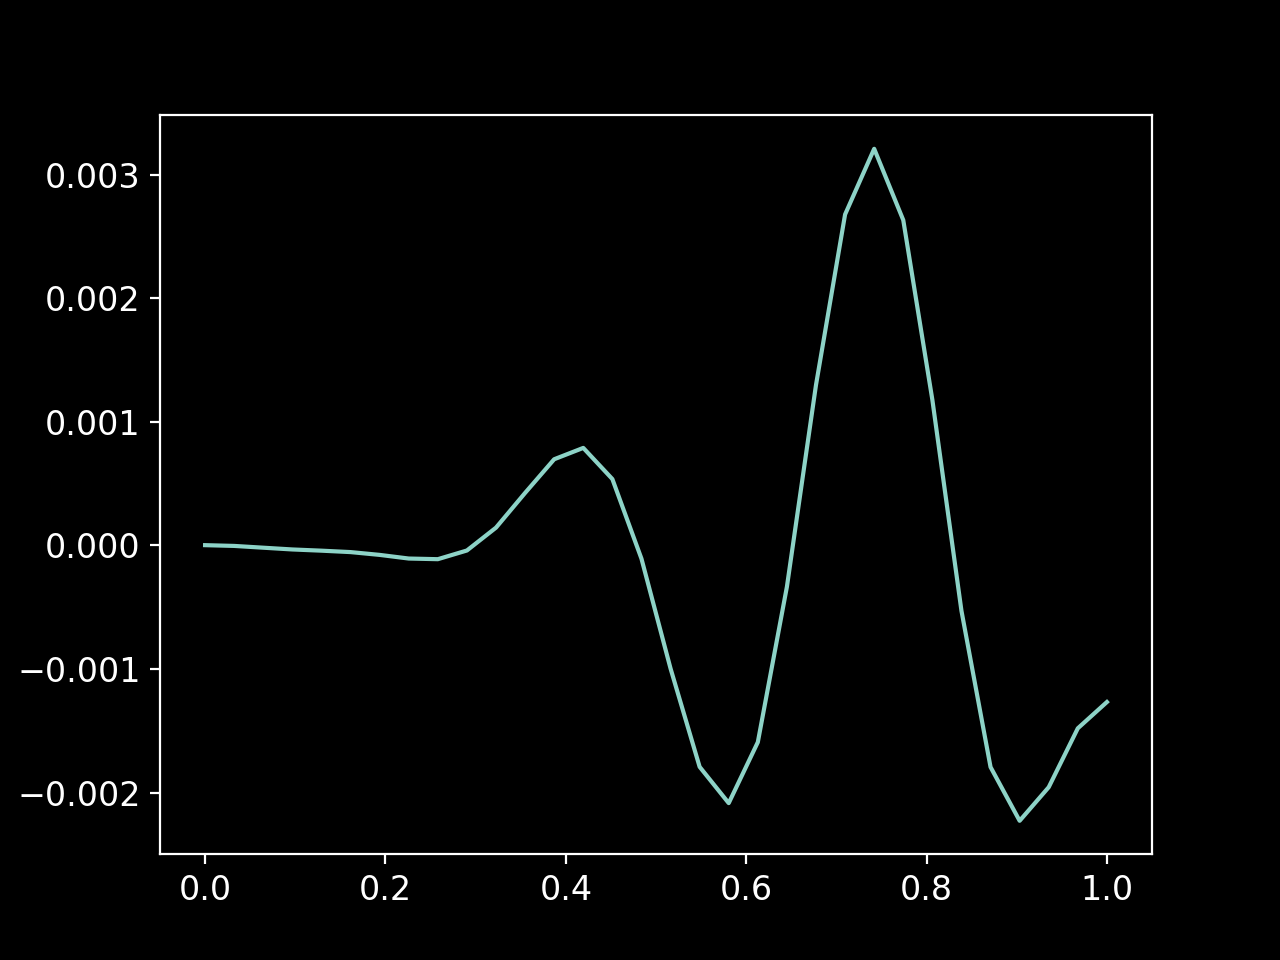

In [126]:
filament.r = filament.R[20, :]
filament.get_separation_vectors()
tangent_angles = filament.compute_tangent_angles()
arc_length_coordinate = np.linspace(0,1, filament.Np)


filament.plotFilament(r = filament.r)

plt.figure()
plt.plot(arc_length_coordinate, tangent_angles)
plt.show()

In [368]:
# Compute the tangent angle matrix
filament.compute_tangent_angle_matrix()

0
100000


<IPython.core.display.Javascript object>


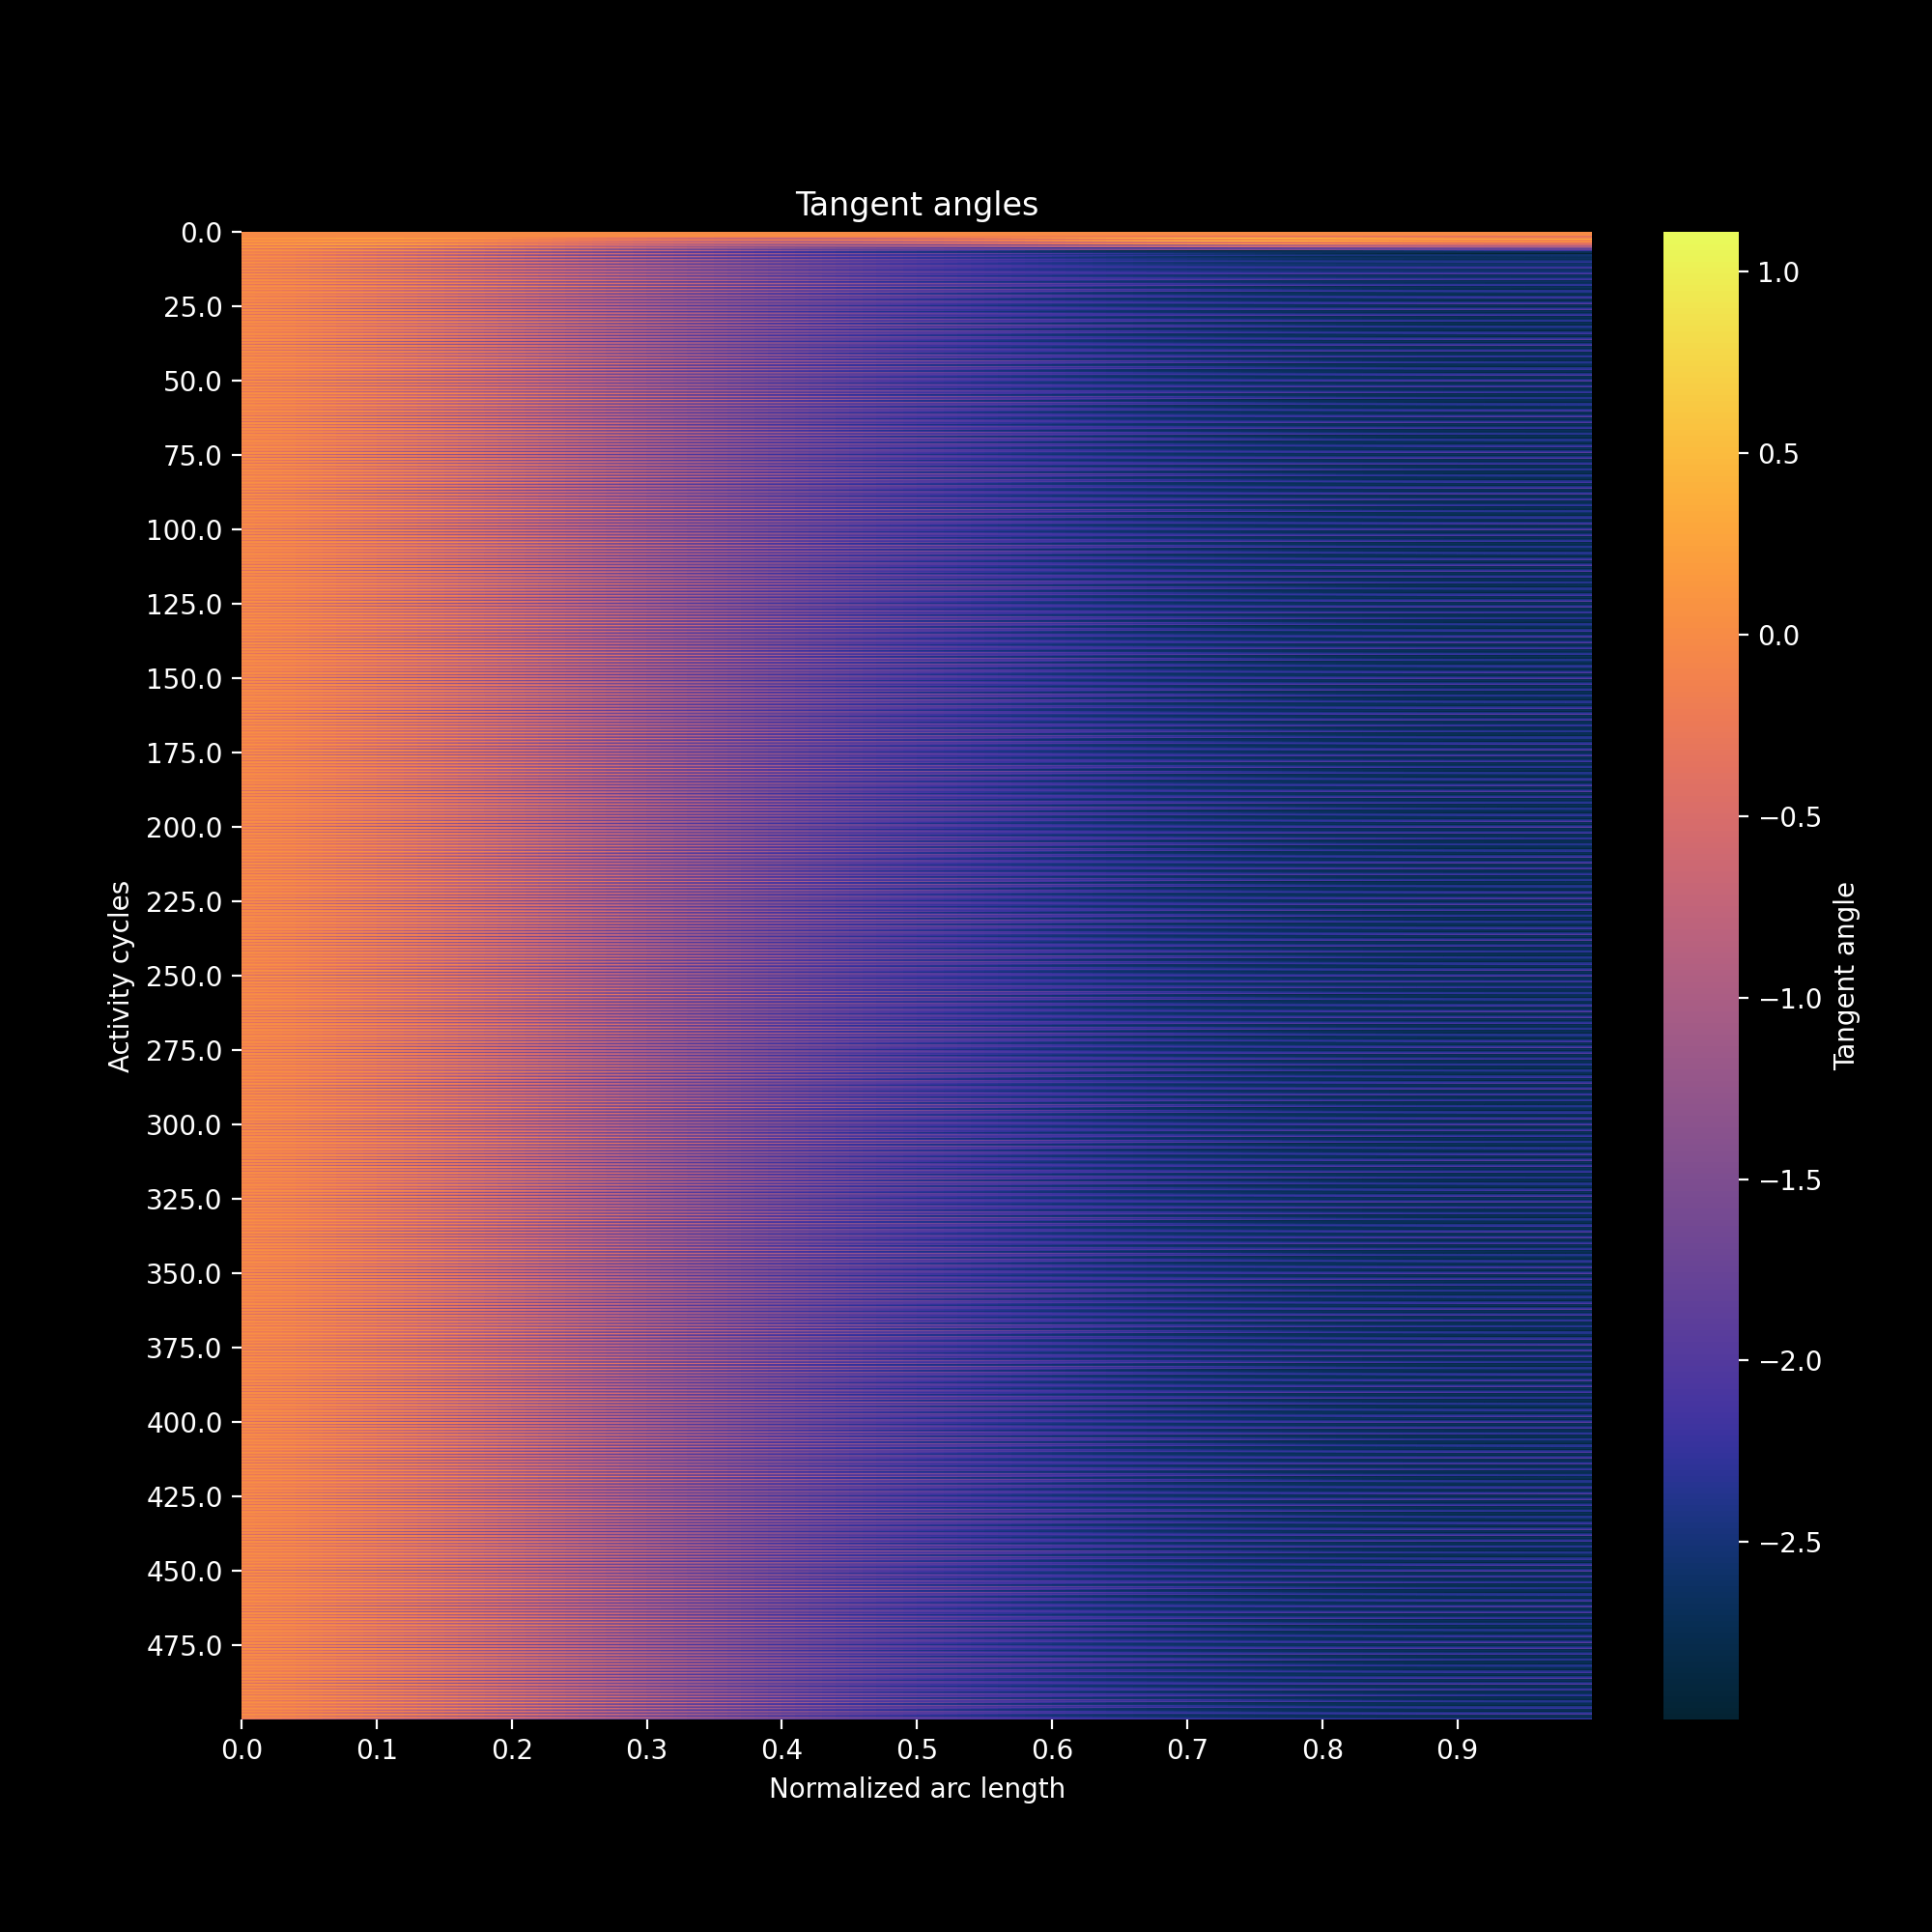

0
10000


<IPython.core.display.Javascript object>


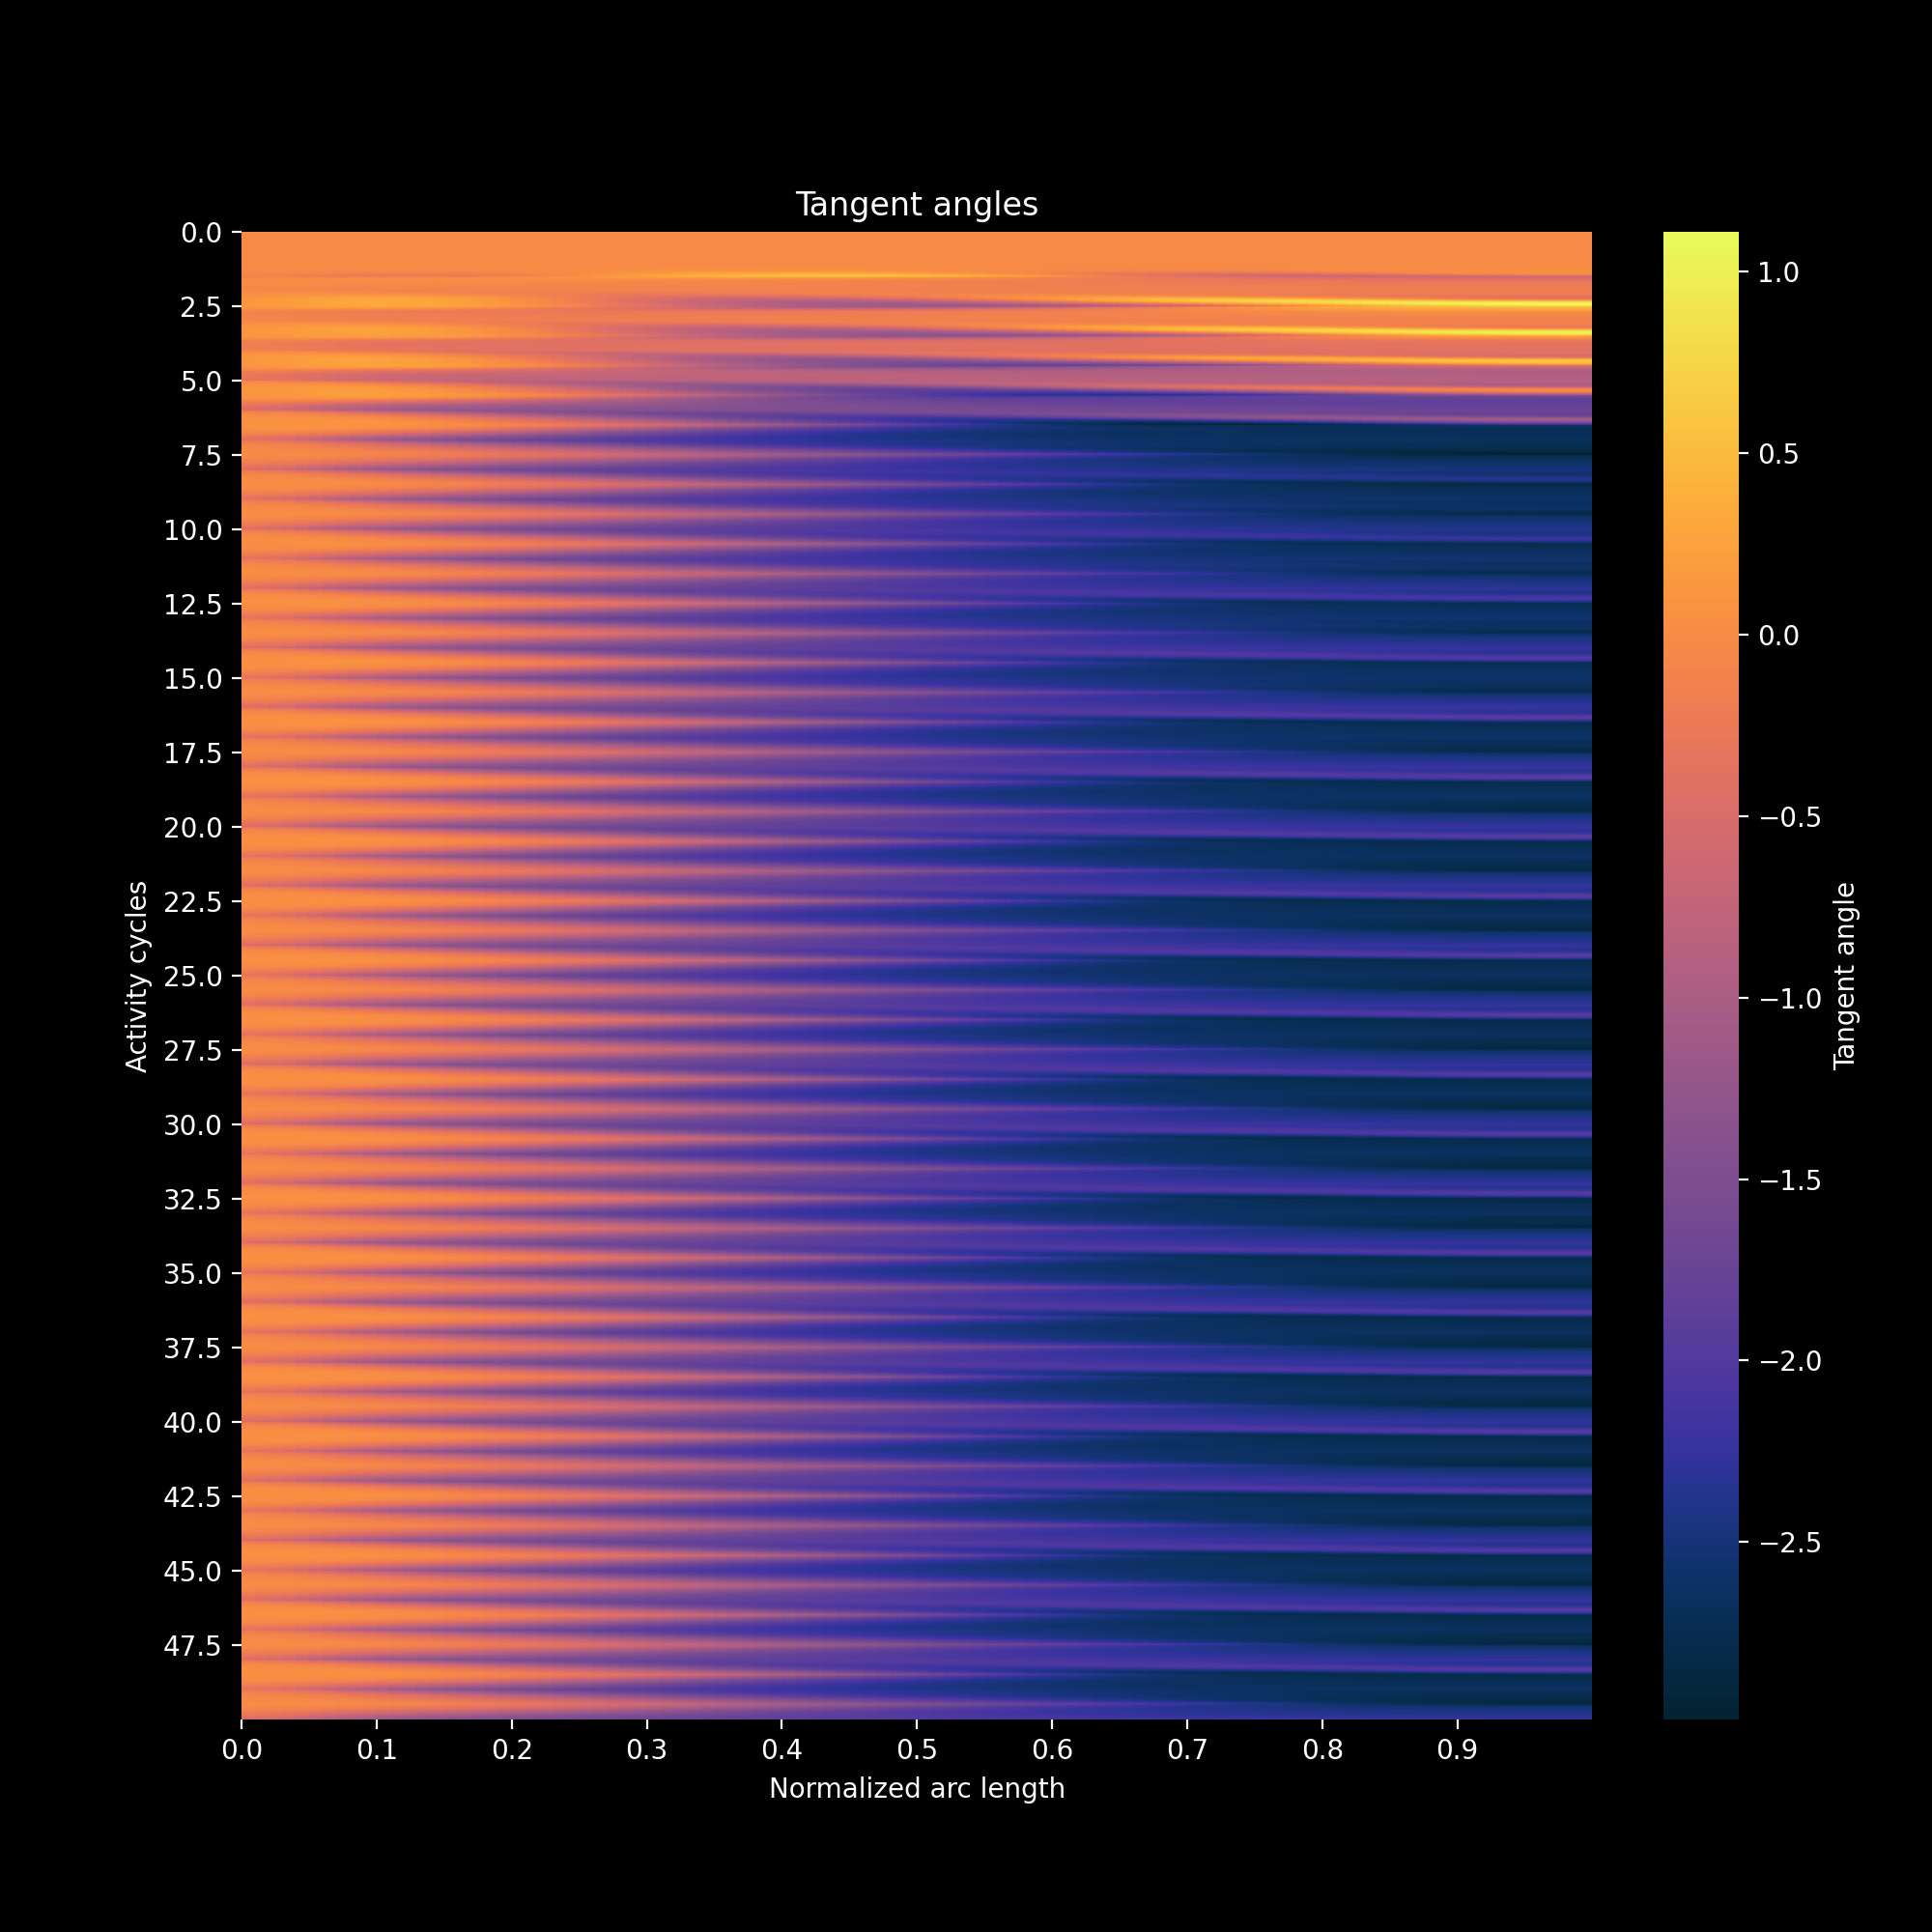

In [343]:
Tf = np.max(filament.Time)
plt.style.use('dark_background')
# Plot the tangent angle matrix
filament.plot_tangent_angle_matrix(save = True, start_time = 0, end_time = Tf)
filament.plot_tangent_angle_matrix(save = True, start_time = 0, end_time = 50*filament.activity_timescale )

## Tangent angle dynamics of the filament tip

<IPython.core.display.Javascript object>


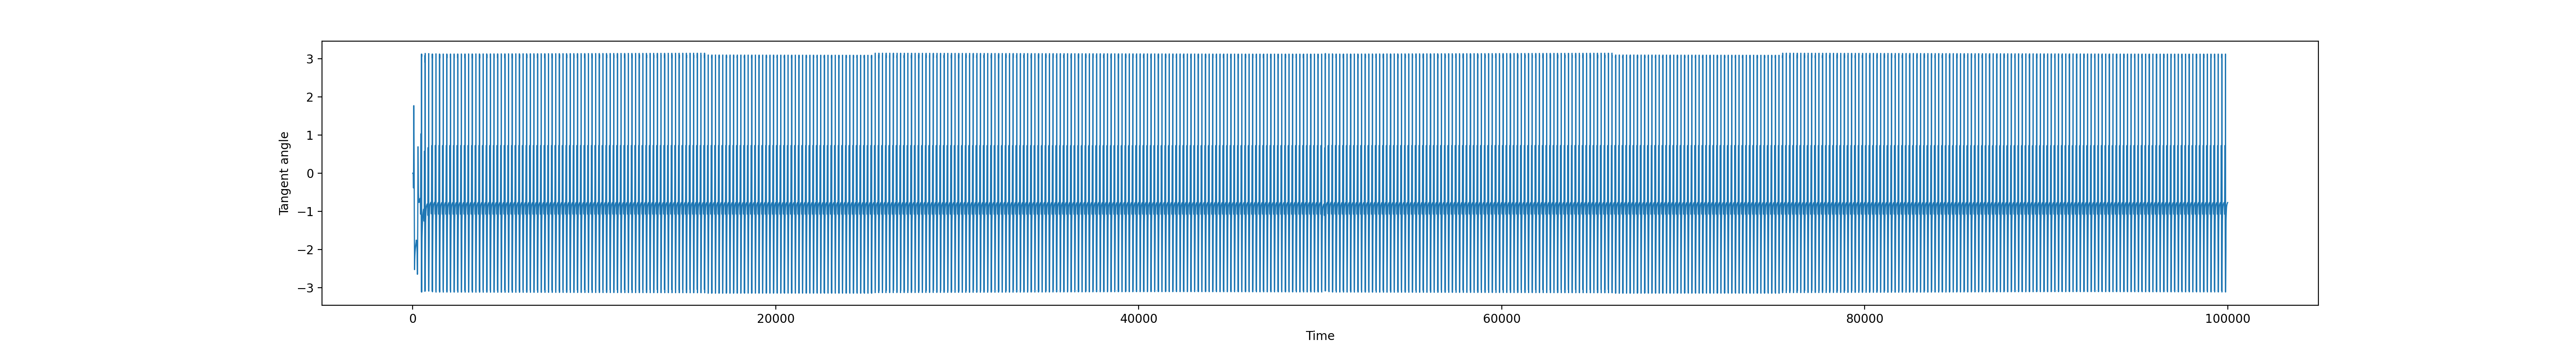

In [355]:
# Plot the tangent angle of the filament tip over time
time_array = range(int(filament.Nt))
plt.figure(figsize = (30,4))
plt.plot(filament.tangent_angles_matrix[:, -1], linewidth = 1)
plt.xlabel('Time')
plt.ylabel('Tangent angle')
ax = plt.gca()
# ax.set_aspect(1)
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'TangentAngle_At_Tip.png'), dpi = 300)
plt.show()

# Shape covariance and PCA

No:of spatial points: 100
No:of time points: 100001
(100001, 100)
(100001, 100)


<IPython.core.display.Javascript object>


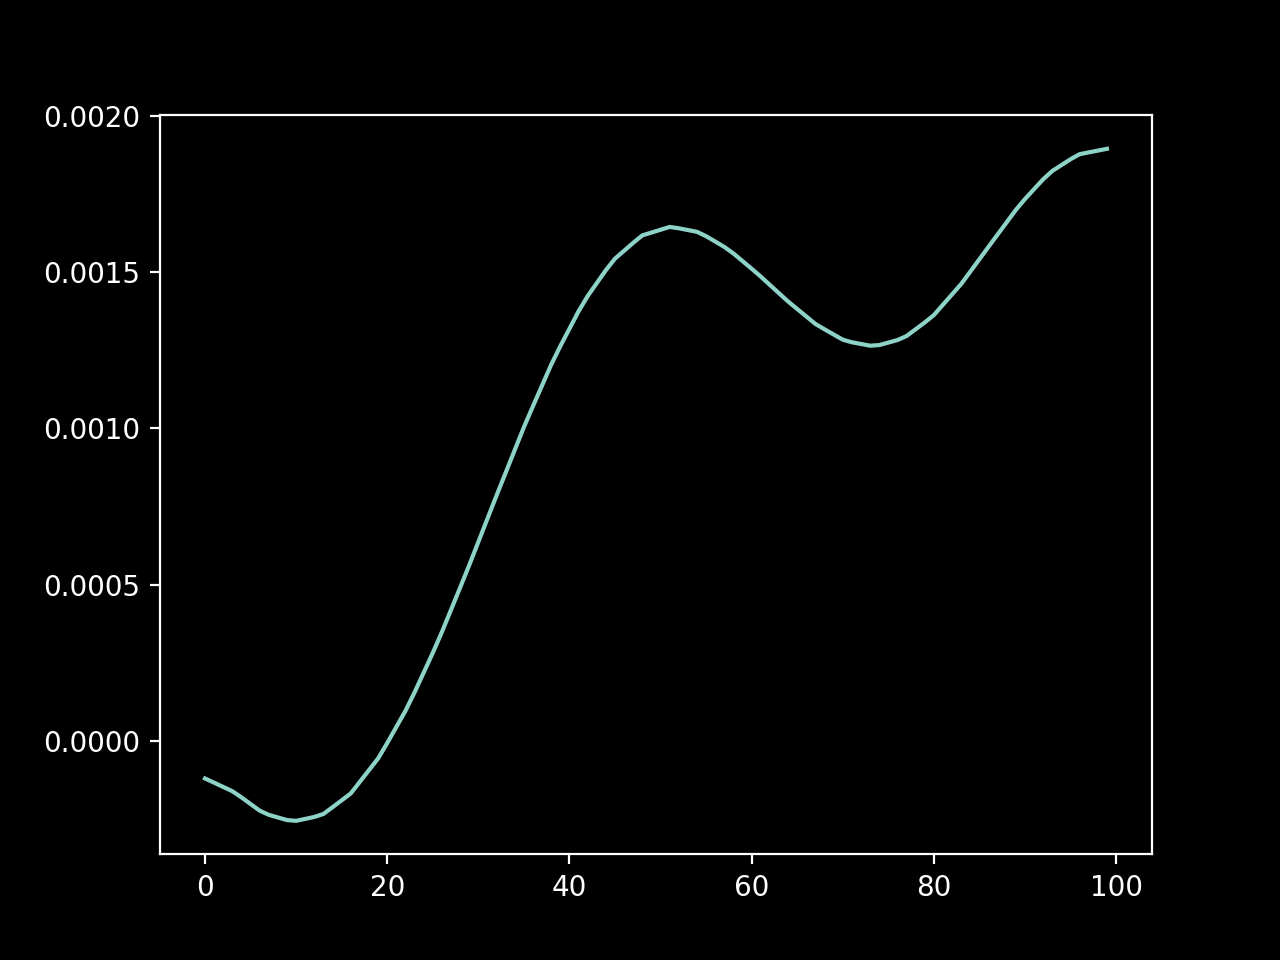

<IPython.core.display.Javascript object>


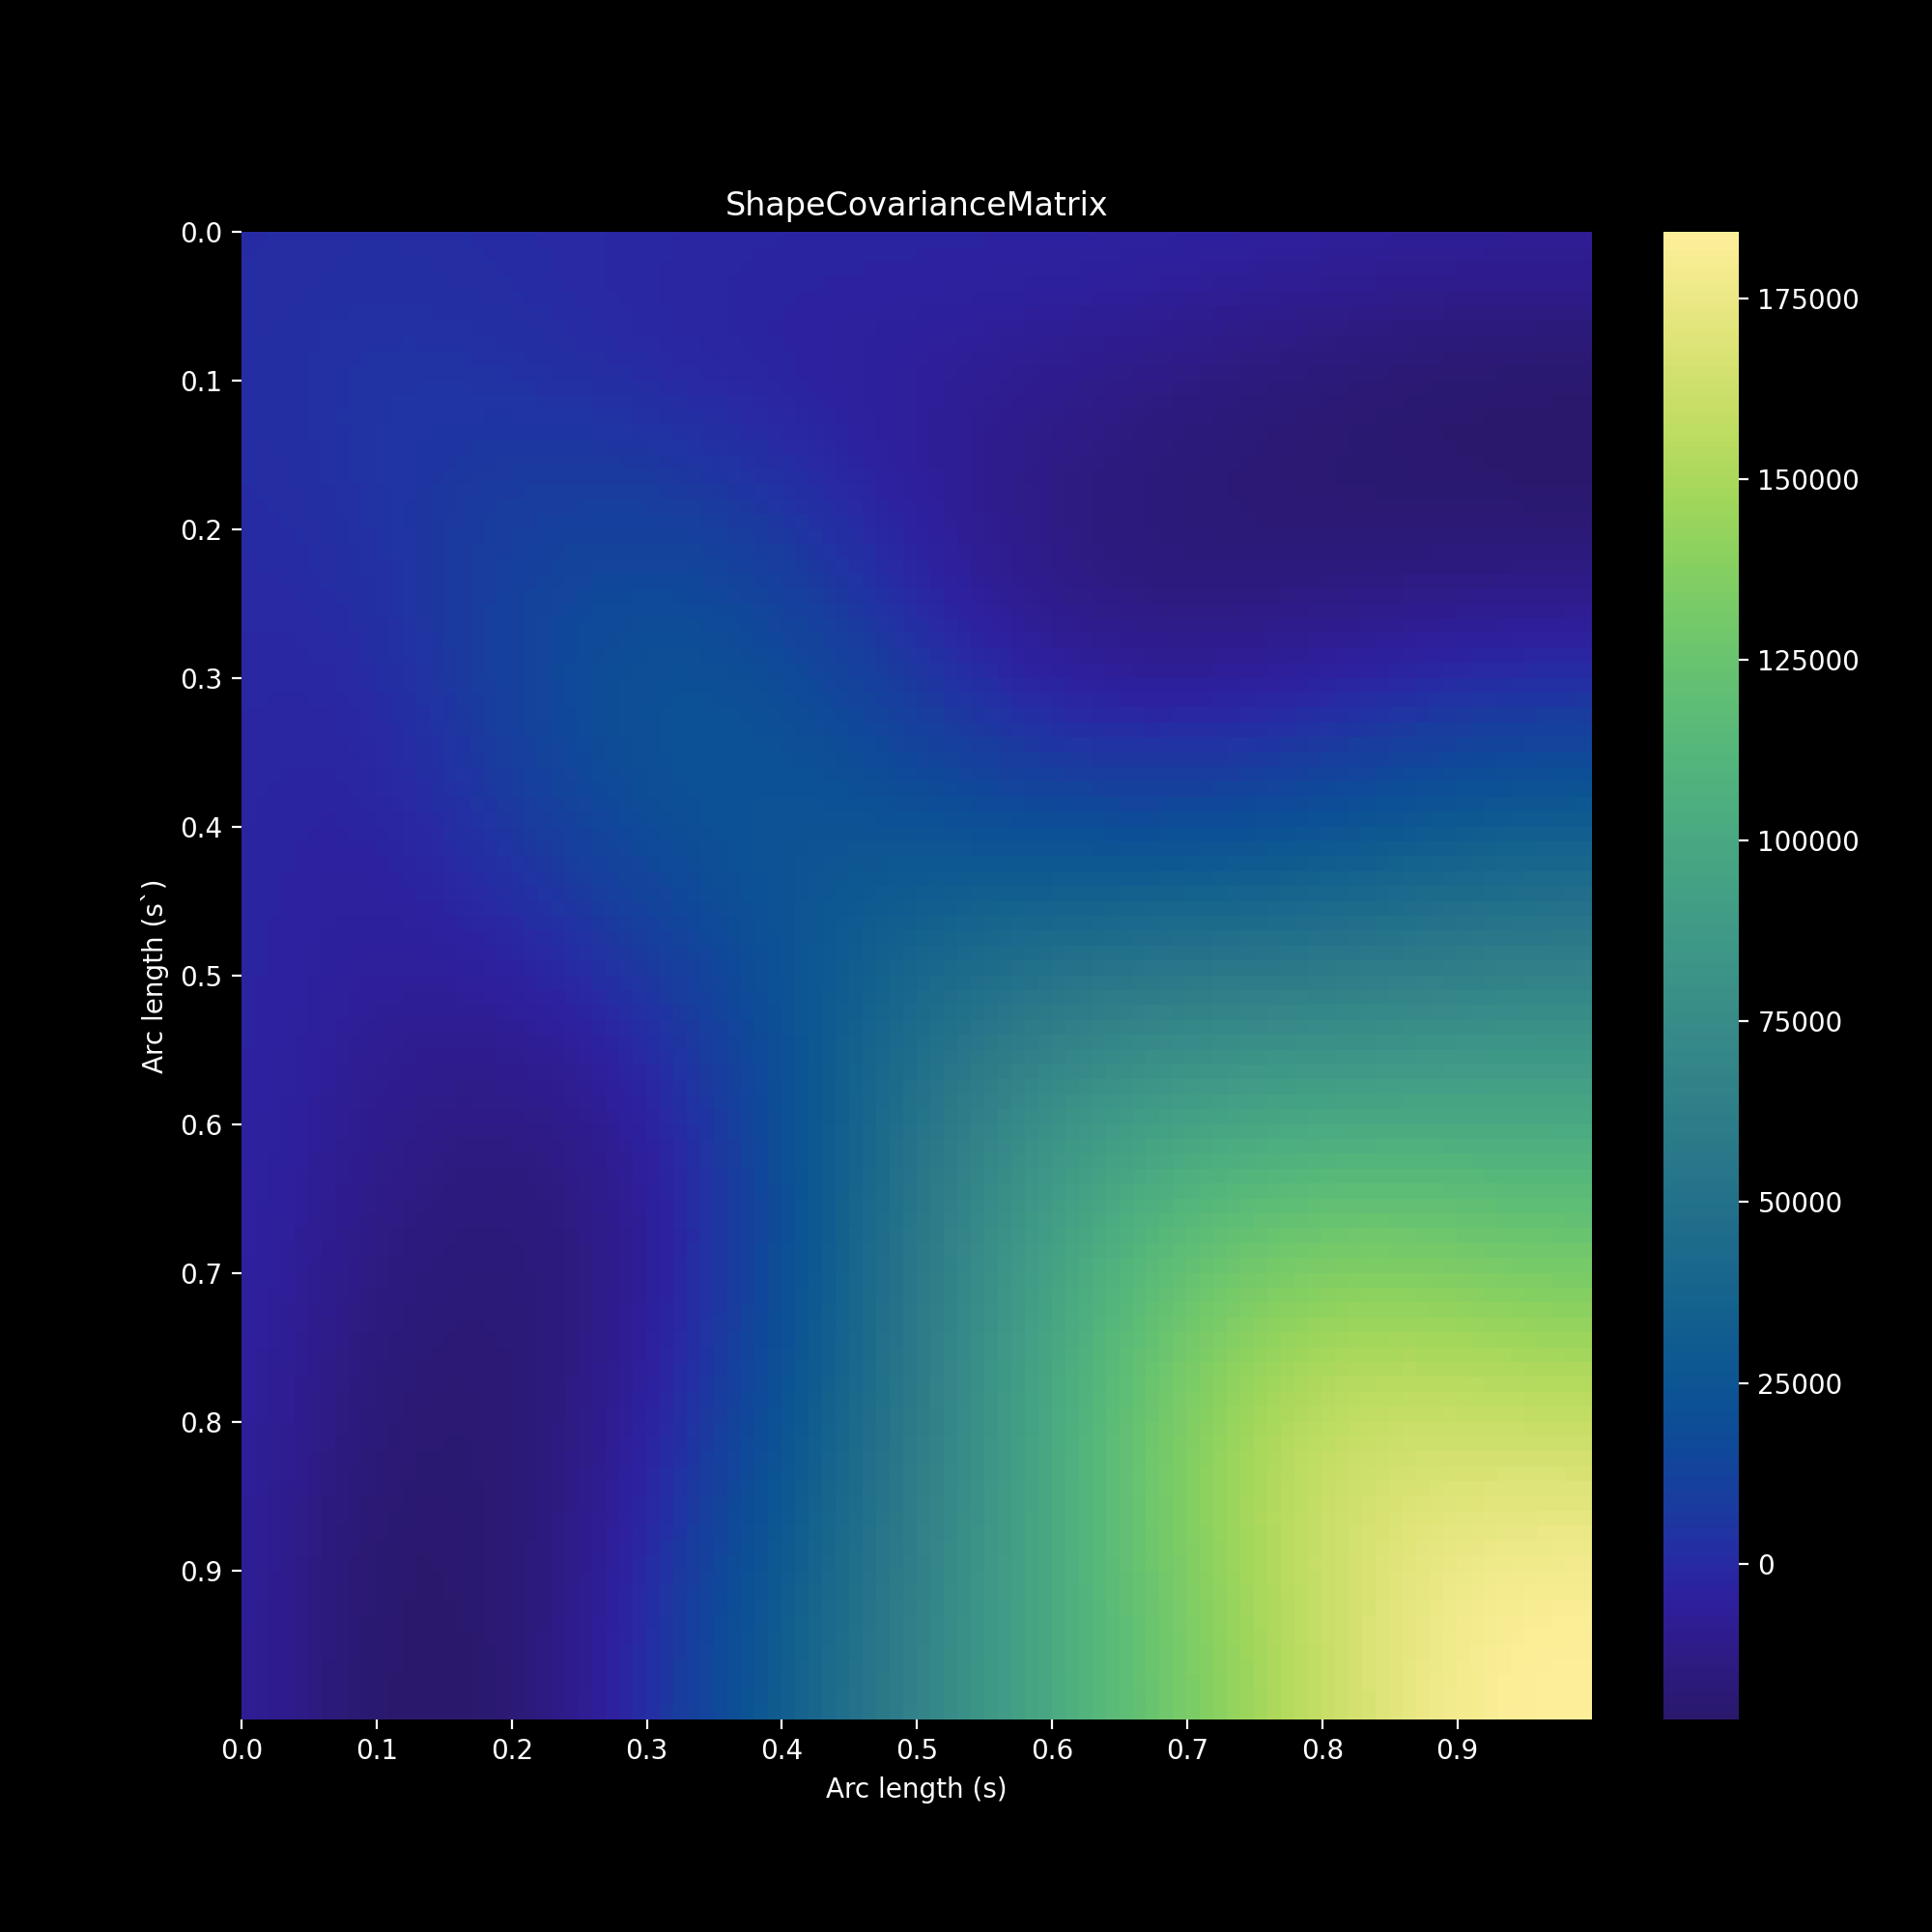

In [369]:
# Compute the shape covariance matrix
filament.compute_shape_covariance_matrix()

# Plot the mean tangent angle vector
plt.figure()
plt.plot(filament.phi_0)
plt.show()

filament.plot_shape_covariance_matrix(save = False)

# Eigen-decompisition of the covariance matrix

In [371]:
d, v = np.linalg.eigh(filament.covariance_matrix)


<IPython.core.display.Javascript object>


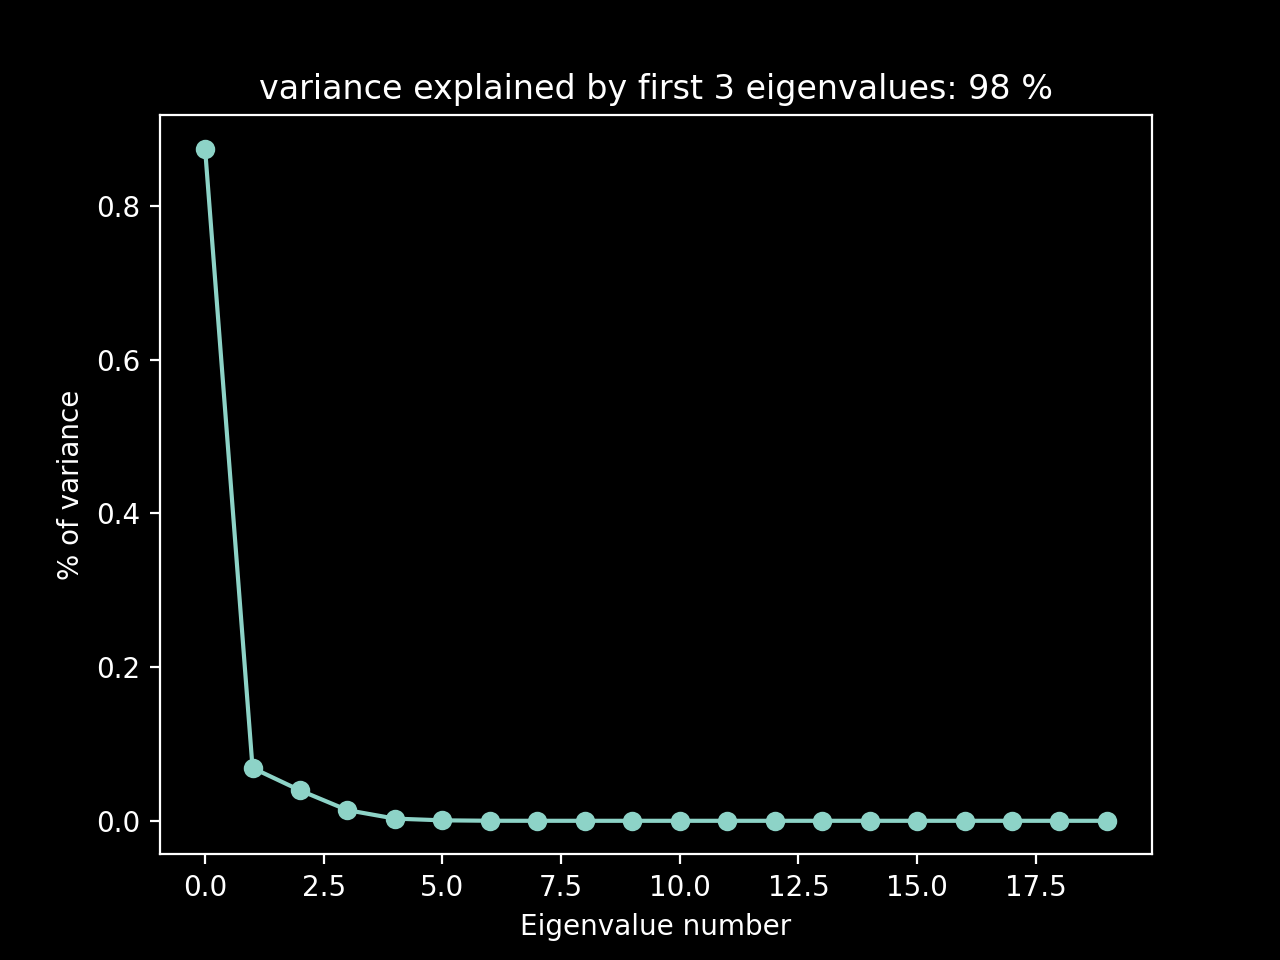

% of variance explained by first 3 eigenvalues: 98.26523073355264


In [373]:
# Plot the eigenvalue spectrum
idx_sorted = np.argsort(-np.real(d))
d_sorted = np.real(d[idx_sorted])

d_normalized = d_sorted/np.sum(d_sorted)


n_sig_eigenvalues = 3
plt.figure()
plt.plot(d_normalized[0:20], marker = 'o')
plt.xlabel('Eigenvalue number')
plt.ylabel('% of variance')
# plt.title('Eigenvalue spectrum')
plt.title('variance explained by first {} eigenvalues: {} %'.format(n_sig_eigenvalues, round(100*np.sum(d_normalized[0:n_sig_eigenvalues]))))
# plt.savefig(os.path.join(file_path, 'EigvalueSpectrum.png'), dpi = 300)
plt.show()

print('% of variance explained by first {} eigenvalues: {}'.format(n_sig_eigenvalues, 100*np.sum(d_normalized[0:n_sig_eigenvalues])))


In [374]:
# Eigenvectors corresponding to the sorted eigenvalues
eigenvectors_sorted = v[:, idx_sorted]

eigenvectors_sig = eigenvectors_sorted[:,0:n_sig_eigenvalues]

print(eigenvectors_sorted)

[[ 0.00667396  0.01064361 -0.01842737 ...  0.          0.58400197
   0.        ]
 [ 0.00752547  0.01078555 -0.02034358 ... -0.02338864 -0.60626288
   0.23388762]
 [ 0.00837697  0.01092749 -0.02225978 ...  0.03616325 -0.26977291
  -0.30002013]
 ...
 [-0.1651097  -0.02926853  0.17793117 ...  0.23622878 -0.00492892
  -0.06156075]
 [-0.16512796 -0.03010271  0.17903517 ... -0.19596451  0.02370029
  -0.11725299]
 [-0.16514623 -0.03093689  0.18013918 ...  0.05042261  0.02084948
   0.12252121]]


<IPython.core.display.Javascript object>


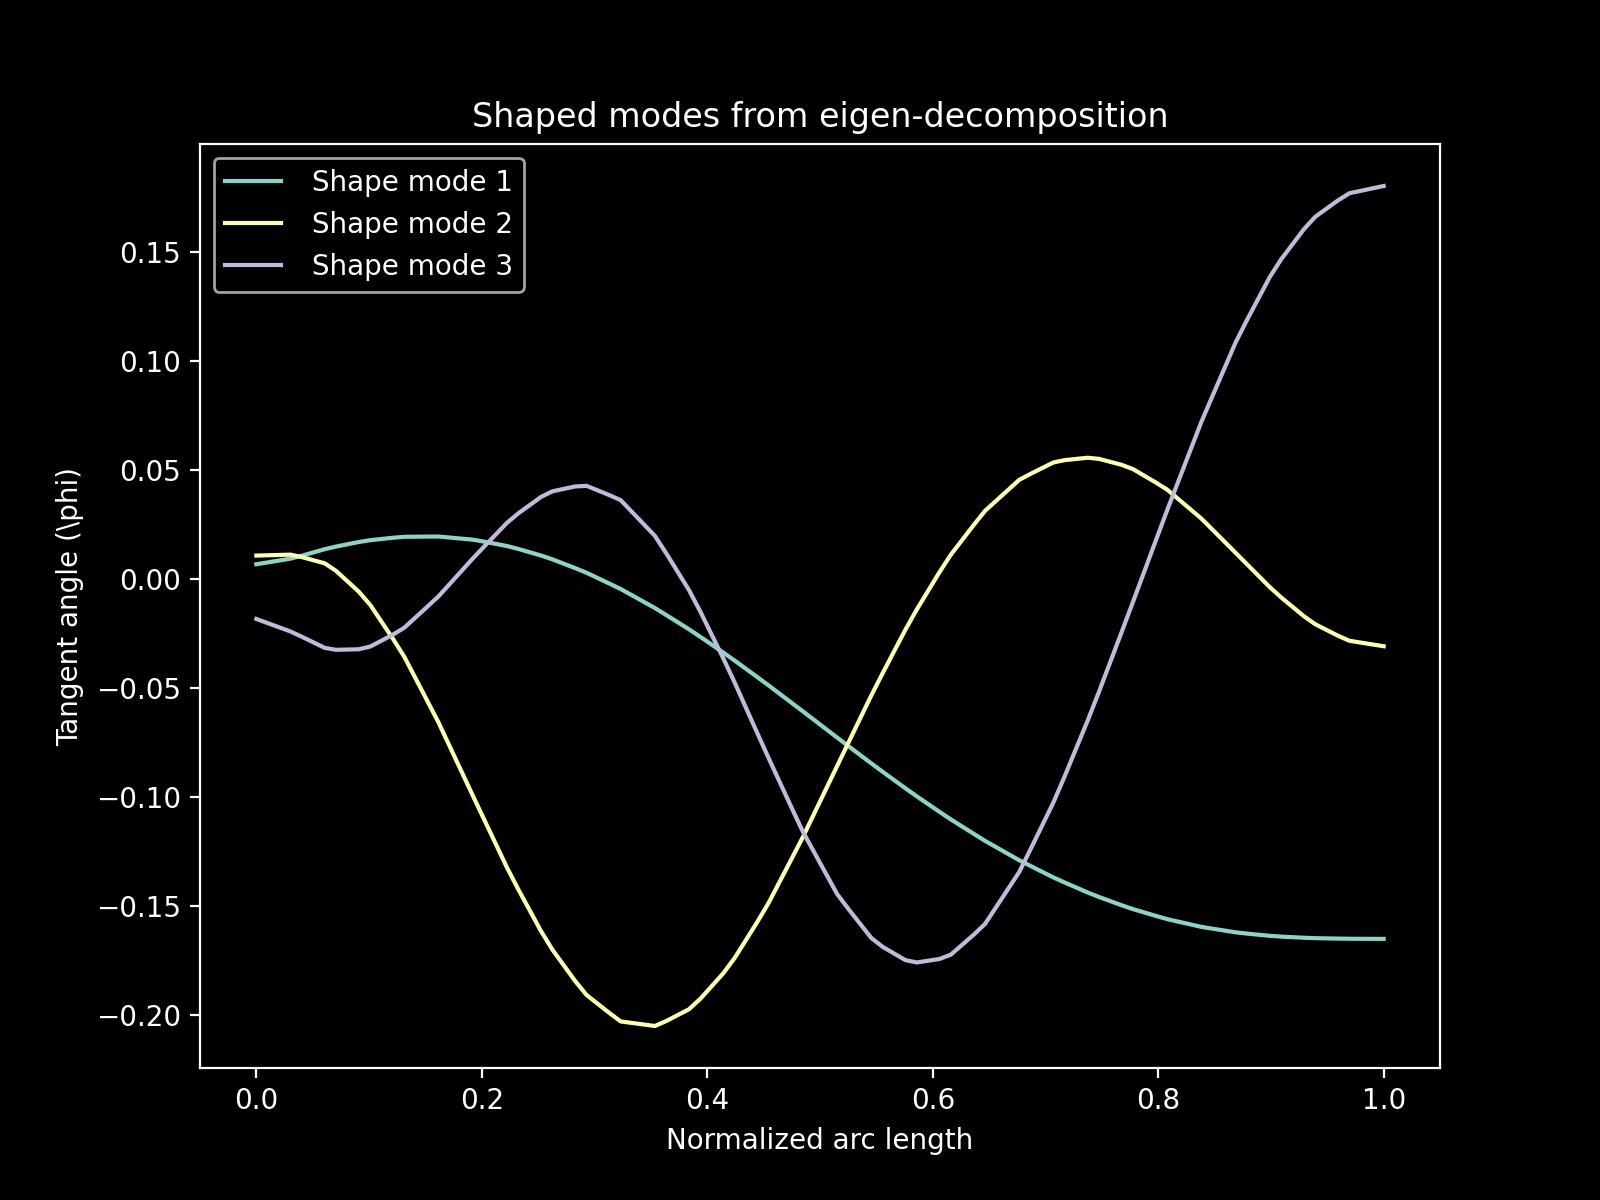

In [375]:
# Shapes corresponding to the eigenvectors
plt.figure(figsize = (8,6))
length_array = np.linspace(0, 1, len(eigenvectors_sig[:,0]))
for ii in range(n_sig_eigenvalues):
    
    plt.plot(length_array, eigenvectors_sorted[:, ii], label =' Shape mode {}'.format(ii+1))
    
plt.xlabel('Normalized arc length')
plt.ylabel('Tangent angle (\phi)')
plt.title('Shaped modes from eigen-decomposition')
plt.legend()
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'_ShapedModes.png'), dpi = 300)
plt.show()

# Projection of general filament shape onto the shape modes


In [376]:
from tqdm import tqdm
import pandas as pd

n_times, n_points = np.shape(filament.tangent_angles_matrix)
mode_amplitudes = np.zeros((n_times, n_sig_eigenvalues))
print(n_times, n_points)

matrix_A = eigenvectors_sig # n_points x n_eigvalues
matrix_A_inv = np.linalg.pinv(matrix_A)

for ii in tqdm(range(n_times)):

    rhs = filament.variance_matrix[ii, :]
    
    
    amplitudes_lst_sq = np.matmul(matrix_A_inv, rhs) # 
    
    for jj in range(n_sig_eigenvalues):
        mode_amplitudes[ii, jj] = amplitudes_lst_sq[jj]
      


 40%|████      | 40132/100001 [00:00<00:00, 401297.42it/s]

100001 100


100%|██████████| 100001/100001 [00:00<00:00, 436246.67it/s]


In [377]:
# Save the mode amplitude time-series
df_dict = {}
df_dict['Time'] = filament.Time

for ii in range(n_sig_eigenvalues):
    
    df_dict['Mode {} amplitude'.format(ii+1)] = mode_amplitudes[:,ii]
    
df_mode_amplitudes = pd.DataFrame(df_dict)
print(df_mode_amplitudes)

df_mode_amplitudes.to_csv(os.path.join(file_path, filament.dataName[:-5]+'_ModeAmplitudes.csv'))

             Time  Mode 1 amplitude  Mode 2 amplitude  Mode 3 amplitude
0             0.0          0.011329          0.004391          0.001657
1            10.0          0.011343          0.004393          0.001642
2            20.0          0.011345          0.004392          0.001641
3            30.0          0.011346          0.004390          0.001641
4            40.0          0.011347          0.004388          0.001641
...           ...               ...               ...               ...
99996    999960.0         11.031955          3.204238          1.483976
99997    999970.0         11.010939          3.253583          1.486308
99998    999980.0         10.989453          3.302066          1.488345
99999    999990.0         10.967501          3.349703          1.490100
100000  1000000.0         10.945087          3.396512          1.491588

[100001 rows x 4 columns]


<IPython.core.display.Javascript object>


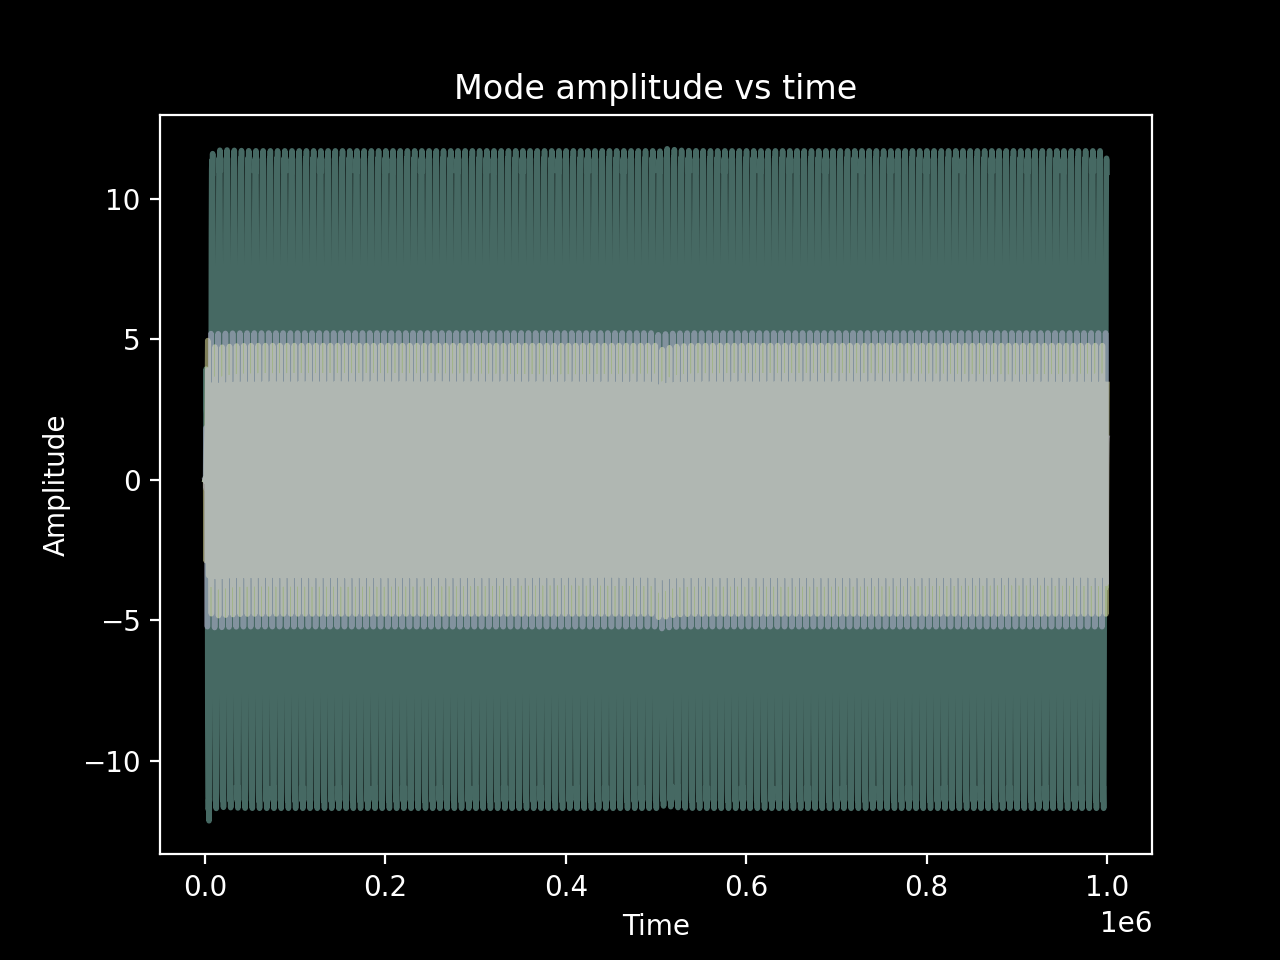

In [378]:
# Plot the dynamics of the mode amplitudes over time

plt.figure()

for ii in range(n_sig_eigenvalues):
    plt.plot(filament.Time, mode_amplitudes[:,ii],linewidth = 2, label = 'Mode {} amplitude'.format(ii+1), alpha = 0.5)
    
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Mode amplitude vs time')
plt.show()

    


<IPython.core.display.Javascript object>


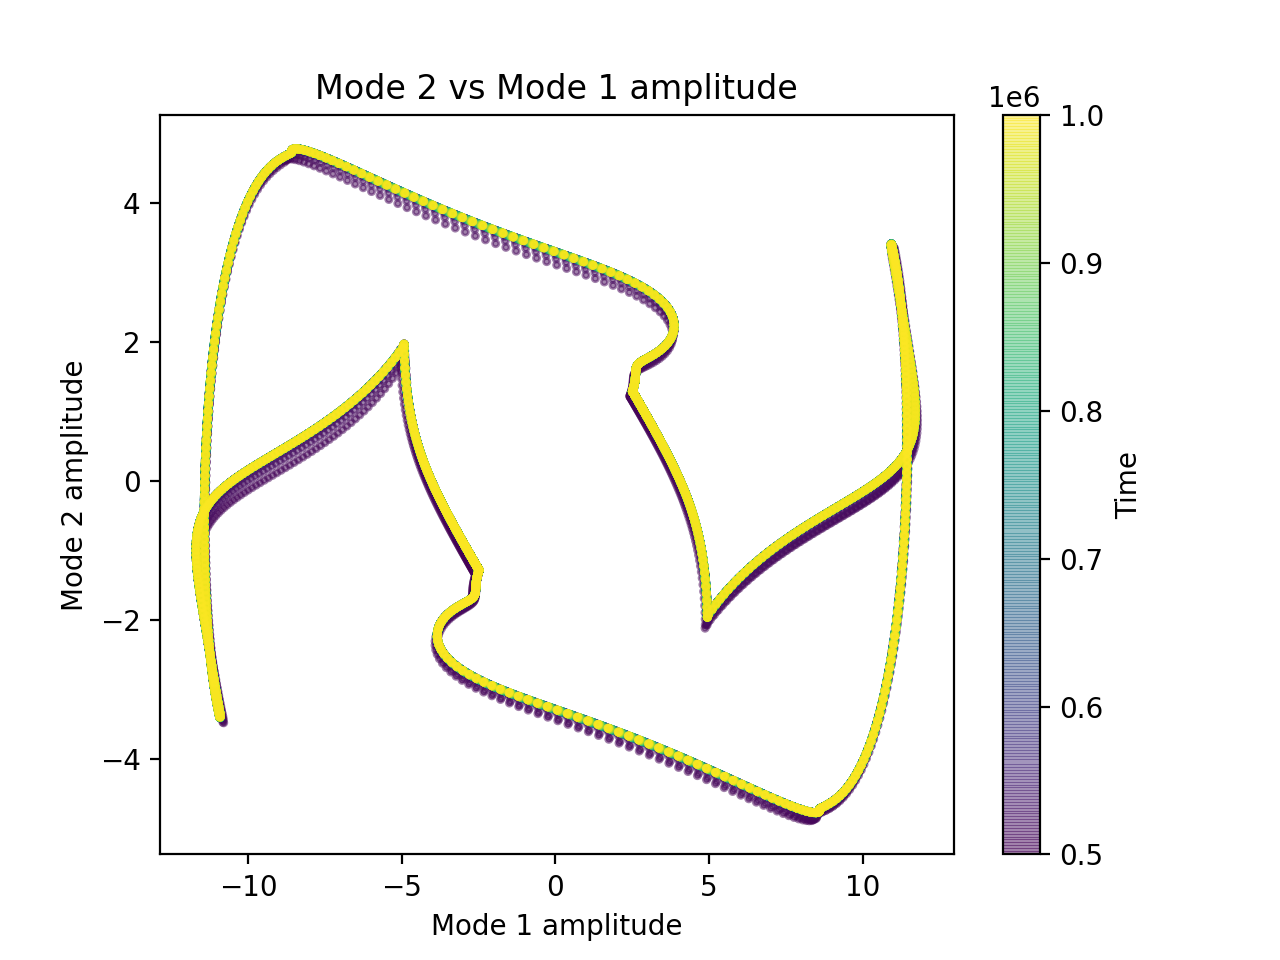

<IPython.core.display.Javascript object>


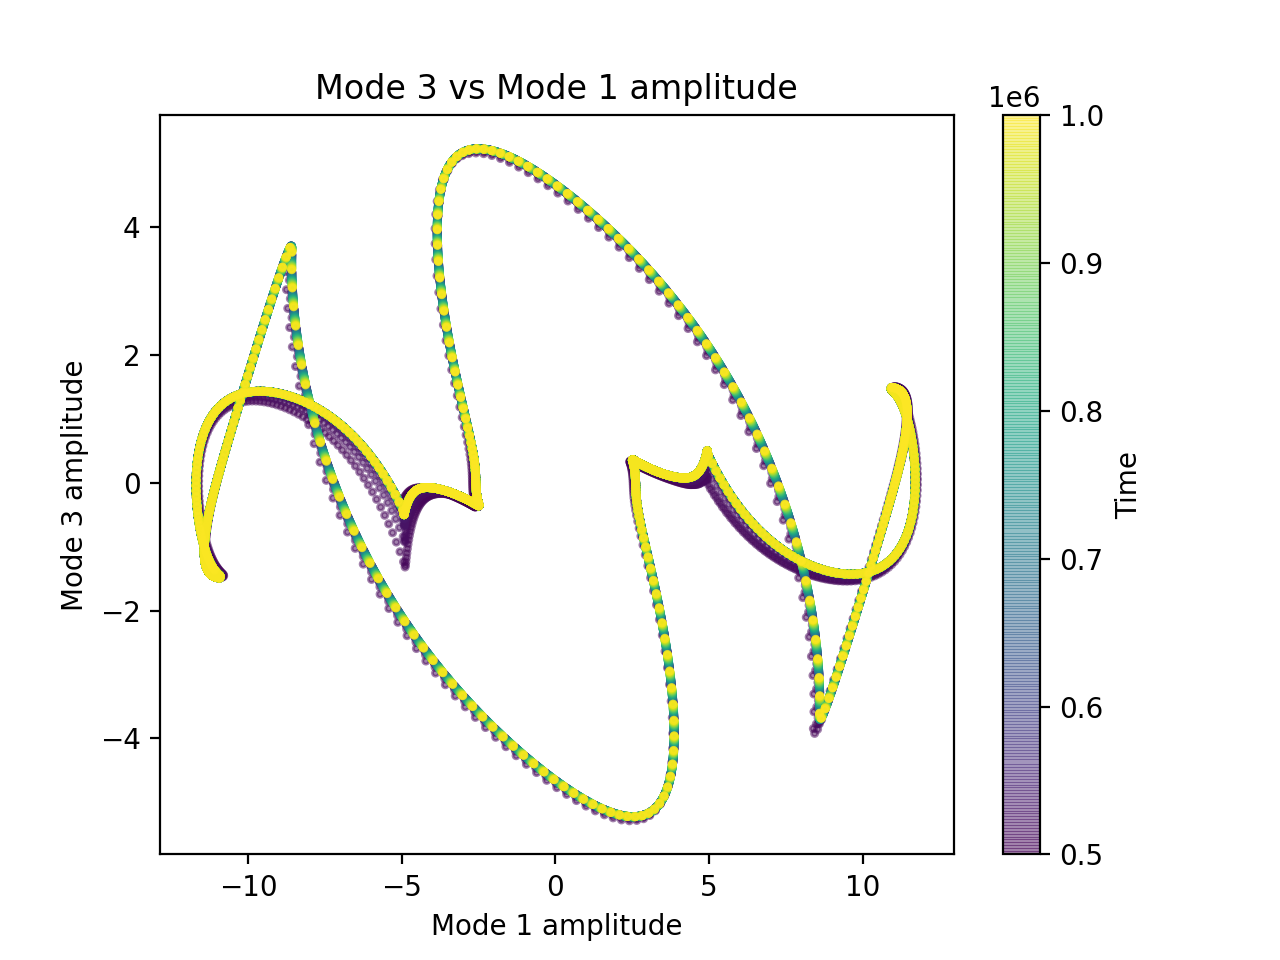

<IPython.core.display.Javascript object>


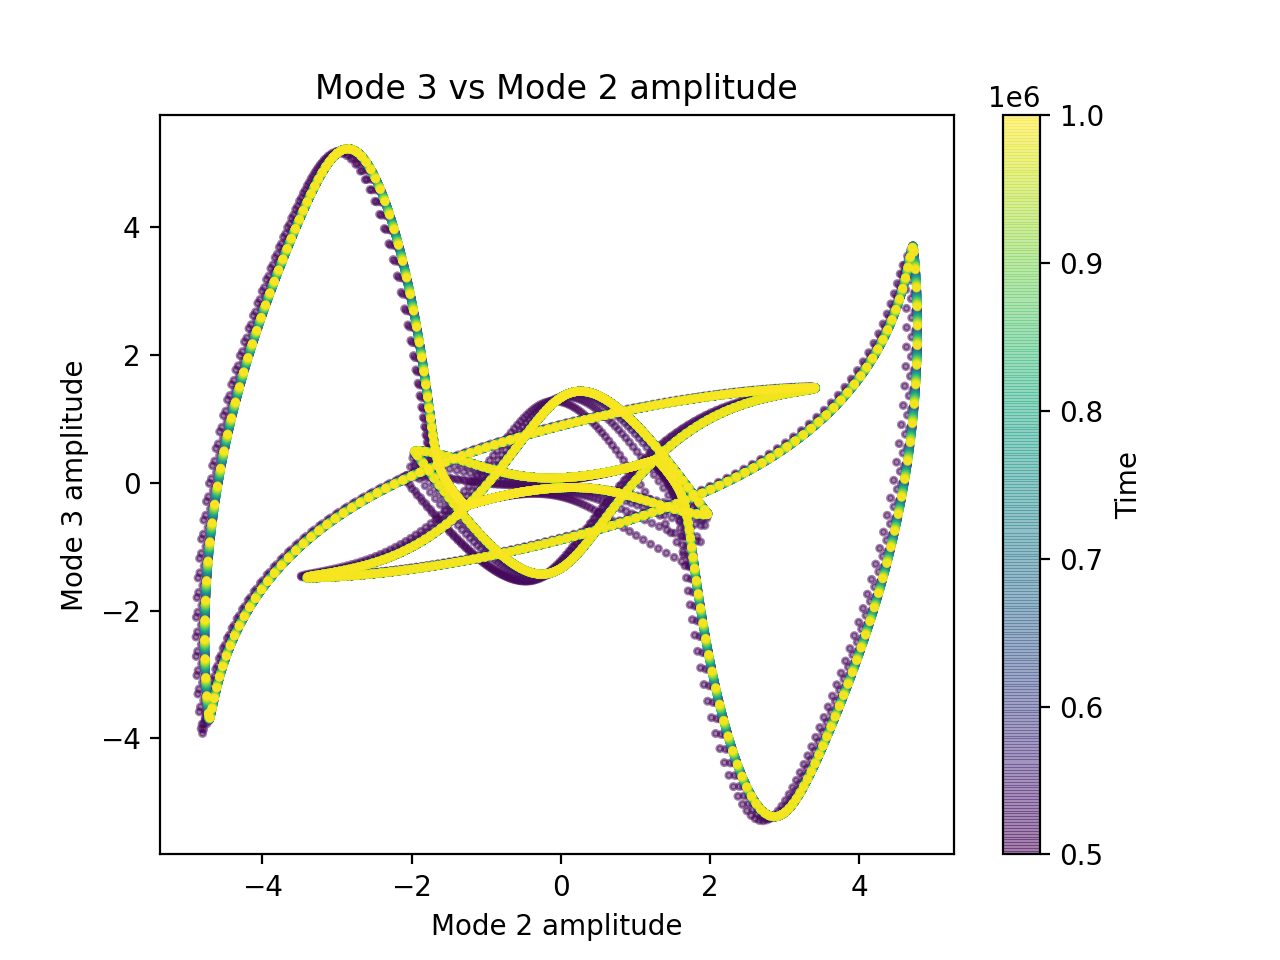

<IPython.core.display.Javascript object>


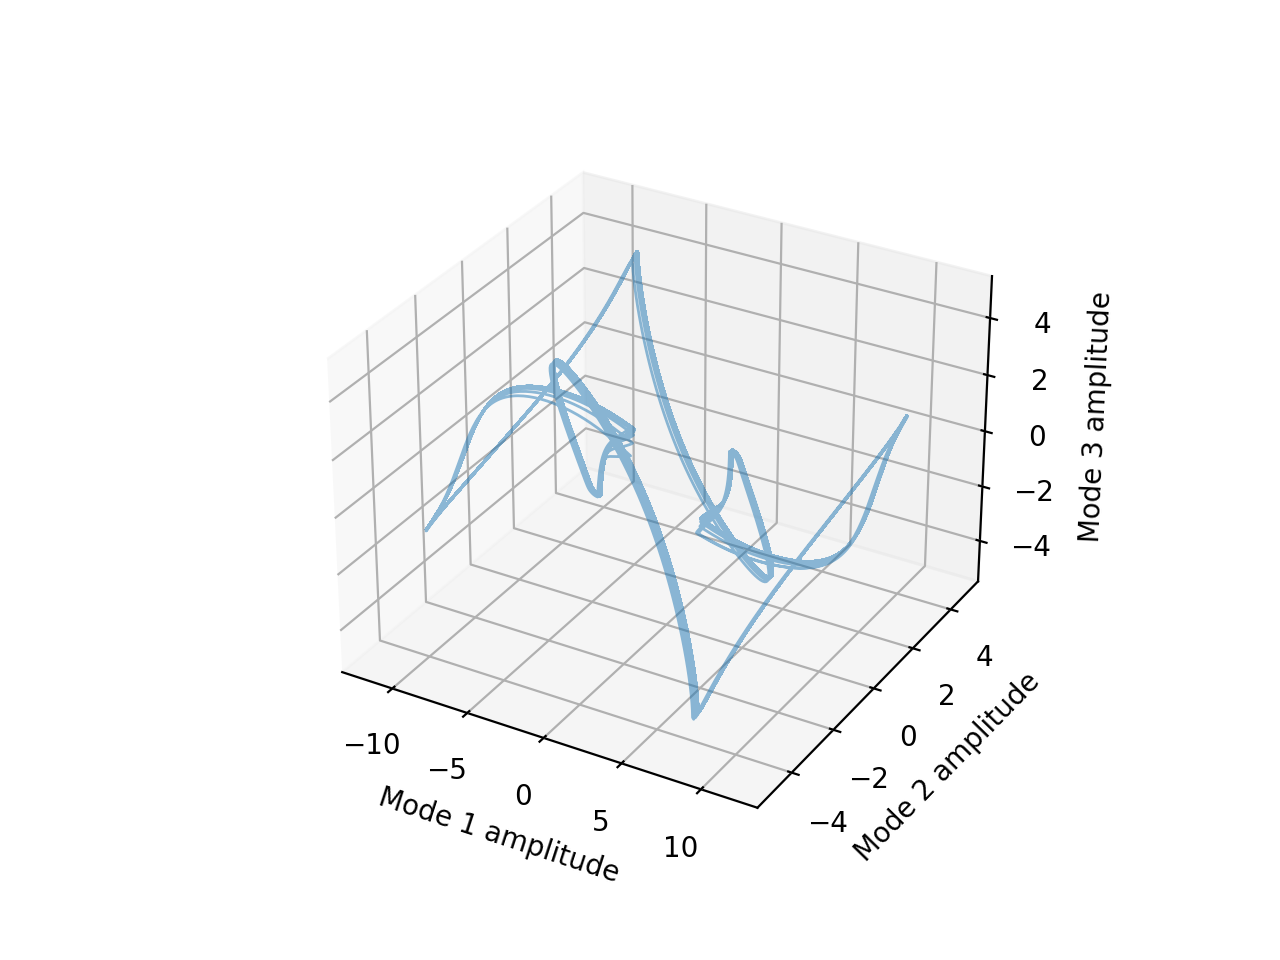

In [379]:
# Scatter-plots to visualize the phase dynamics
plt.style.use('default')

plt.figure()
ax1 = plt.scatter(mode_amplitudes[int(filament.Nt/2):,0], mode_amplitudes[int(filament.Nt/2):,1], 5, c = filament.Time[int(filament.Nt/2):], alpha = 0.5)
plt.xlabel('Mode 1 amplitude')
plt.ylabel('Mode 2 amplitude')
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Time')
plt.title('Mode 2 vs Mode 1 amplitude')
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'Mode2vsMode1.png'), dpi = 300)

plt.show()

plt.figure()
ax1 = plt.scatter(mode_amplitudes[int(filament.Nt/2):,0], mode_amplitudes[int(filament.Nt/2):,2], 5, c = filament.Time[int(filament.Nt/2):], alpha = 0.5)
plt.xlabel('Mode 1 amplitude')
plt.ylabel('Mode 3 amplitude')
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Time')
plt.title('Mode 3 vs Mode 1 amplitude')
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'Mode3vsMode1.png'), dpi = 300)
plt.show()

plt.figure()
ax1 = plt.scatter(mode_amplitudes[int(filament.Nt/2):,1], mode_amplitudes[int(filament.Nt/2):,2], 5, c = filament.Time[int(filament.Nt/2):], alpha = 0.5)
plt.xlabel('Mode 2 amplitude')
plt.ylabel('Mode 3 amplitude')
cbar = plt.colorbar(ax1)
cbar.ax.set_ylabel('Time')
plt.title('Mode 3 vs Mode 2 amplitude')
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'Mode3vsMode2.png'), dpi = 300)
plt.show()

# plt.style.use('dark_background')
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(mode_amplitudes[int(filament.Nt/2):,0], mode_amplitudes[int(filament.Nt/2):,1], mode_amplitudes[int(filament.Nt/2):,2], linewidth = 1, alpha = 0.5)
ax.set_xlabel('Mode 1 amplitude')
ax.set_ylabel('Mode 2 amplitude')
ax.set_zlabel('Mode 3 amplitude')
plt.savefig(os.path.join(file_path, filament.dataName[:-5]+'Mode3vsMode2vsMode1.png'), dpi = 300)

plt.show()